In [ ]:
!pip install rasterio

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import matplotlib as mpl
from matplotlib import cm, colors
import sqlite3
from IPython.display import display

In [ ]:
conn = sqlite3.connect("compiled_gcbm_output.db")

### Query

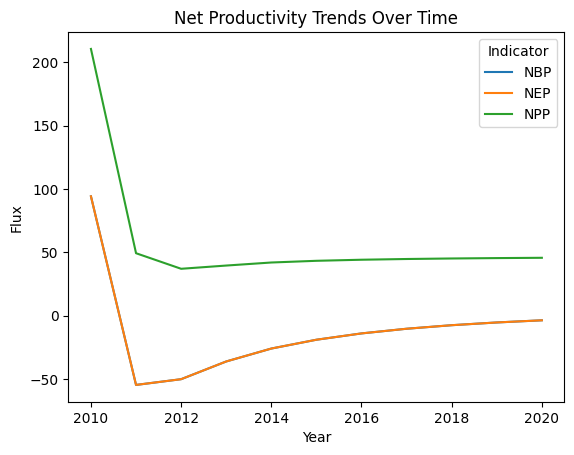

indicator,NBP,NEP,NPP
year,,,
2010,94.283011,94.283011,210.671078
2011,-54.620806,-54.620806,49.367503
2012,-50.095604,-50.095604,37.077428
2013,-36.103187,-36.103187,39.630203
2014,-25.905807,-25.905807,42.033489
2015,-18.941335,-18.941335,43.378536
2016,-13.953728,-13.953728,44.224549
2017,-10.265992,-10.265992,44.799577
2018,-7.470406,-7.470406,45.211999


In [ ]:
# SQL query
query = """
        SELECT year, indicator, SUM(flux_tc) / 1e6 AS flux_mt
        FROM v_stock_change_indicators_density
        WHERE indicator IN ('NPP', 'NEP', 'NBP') AND year BETWEEN 1900 AND 2050
        GROUP BY year, indicator
        ORDER BY year, indicator
        """
df = pd.read_sql_query(query, conn)

# Pivot data
pivot_df = df.pivot(index='year', columns='indicator', values='flux_mt')

# Plot
pivot_df.plot(kind='line')
plt.title('Net Productivity Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Flux')
plt.grid(False)
plt.legend(title='Indicator')
plt.show()

# Display chart
display(pivot_df)

### Spatial time lapse

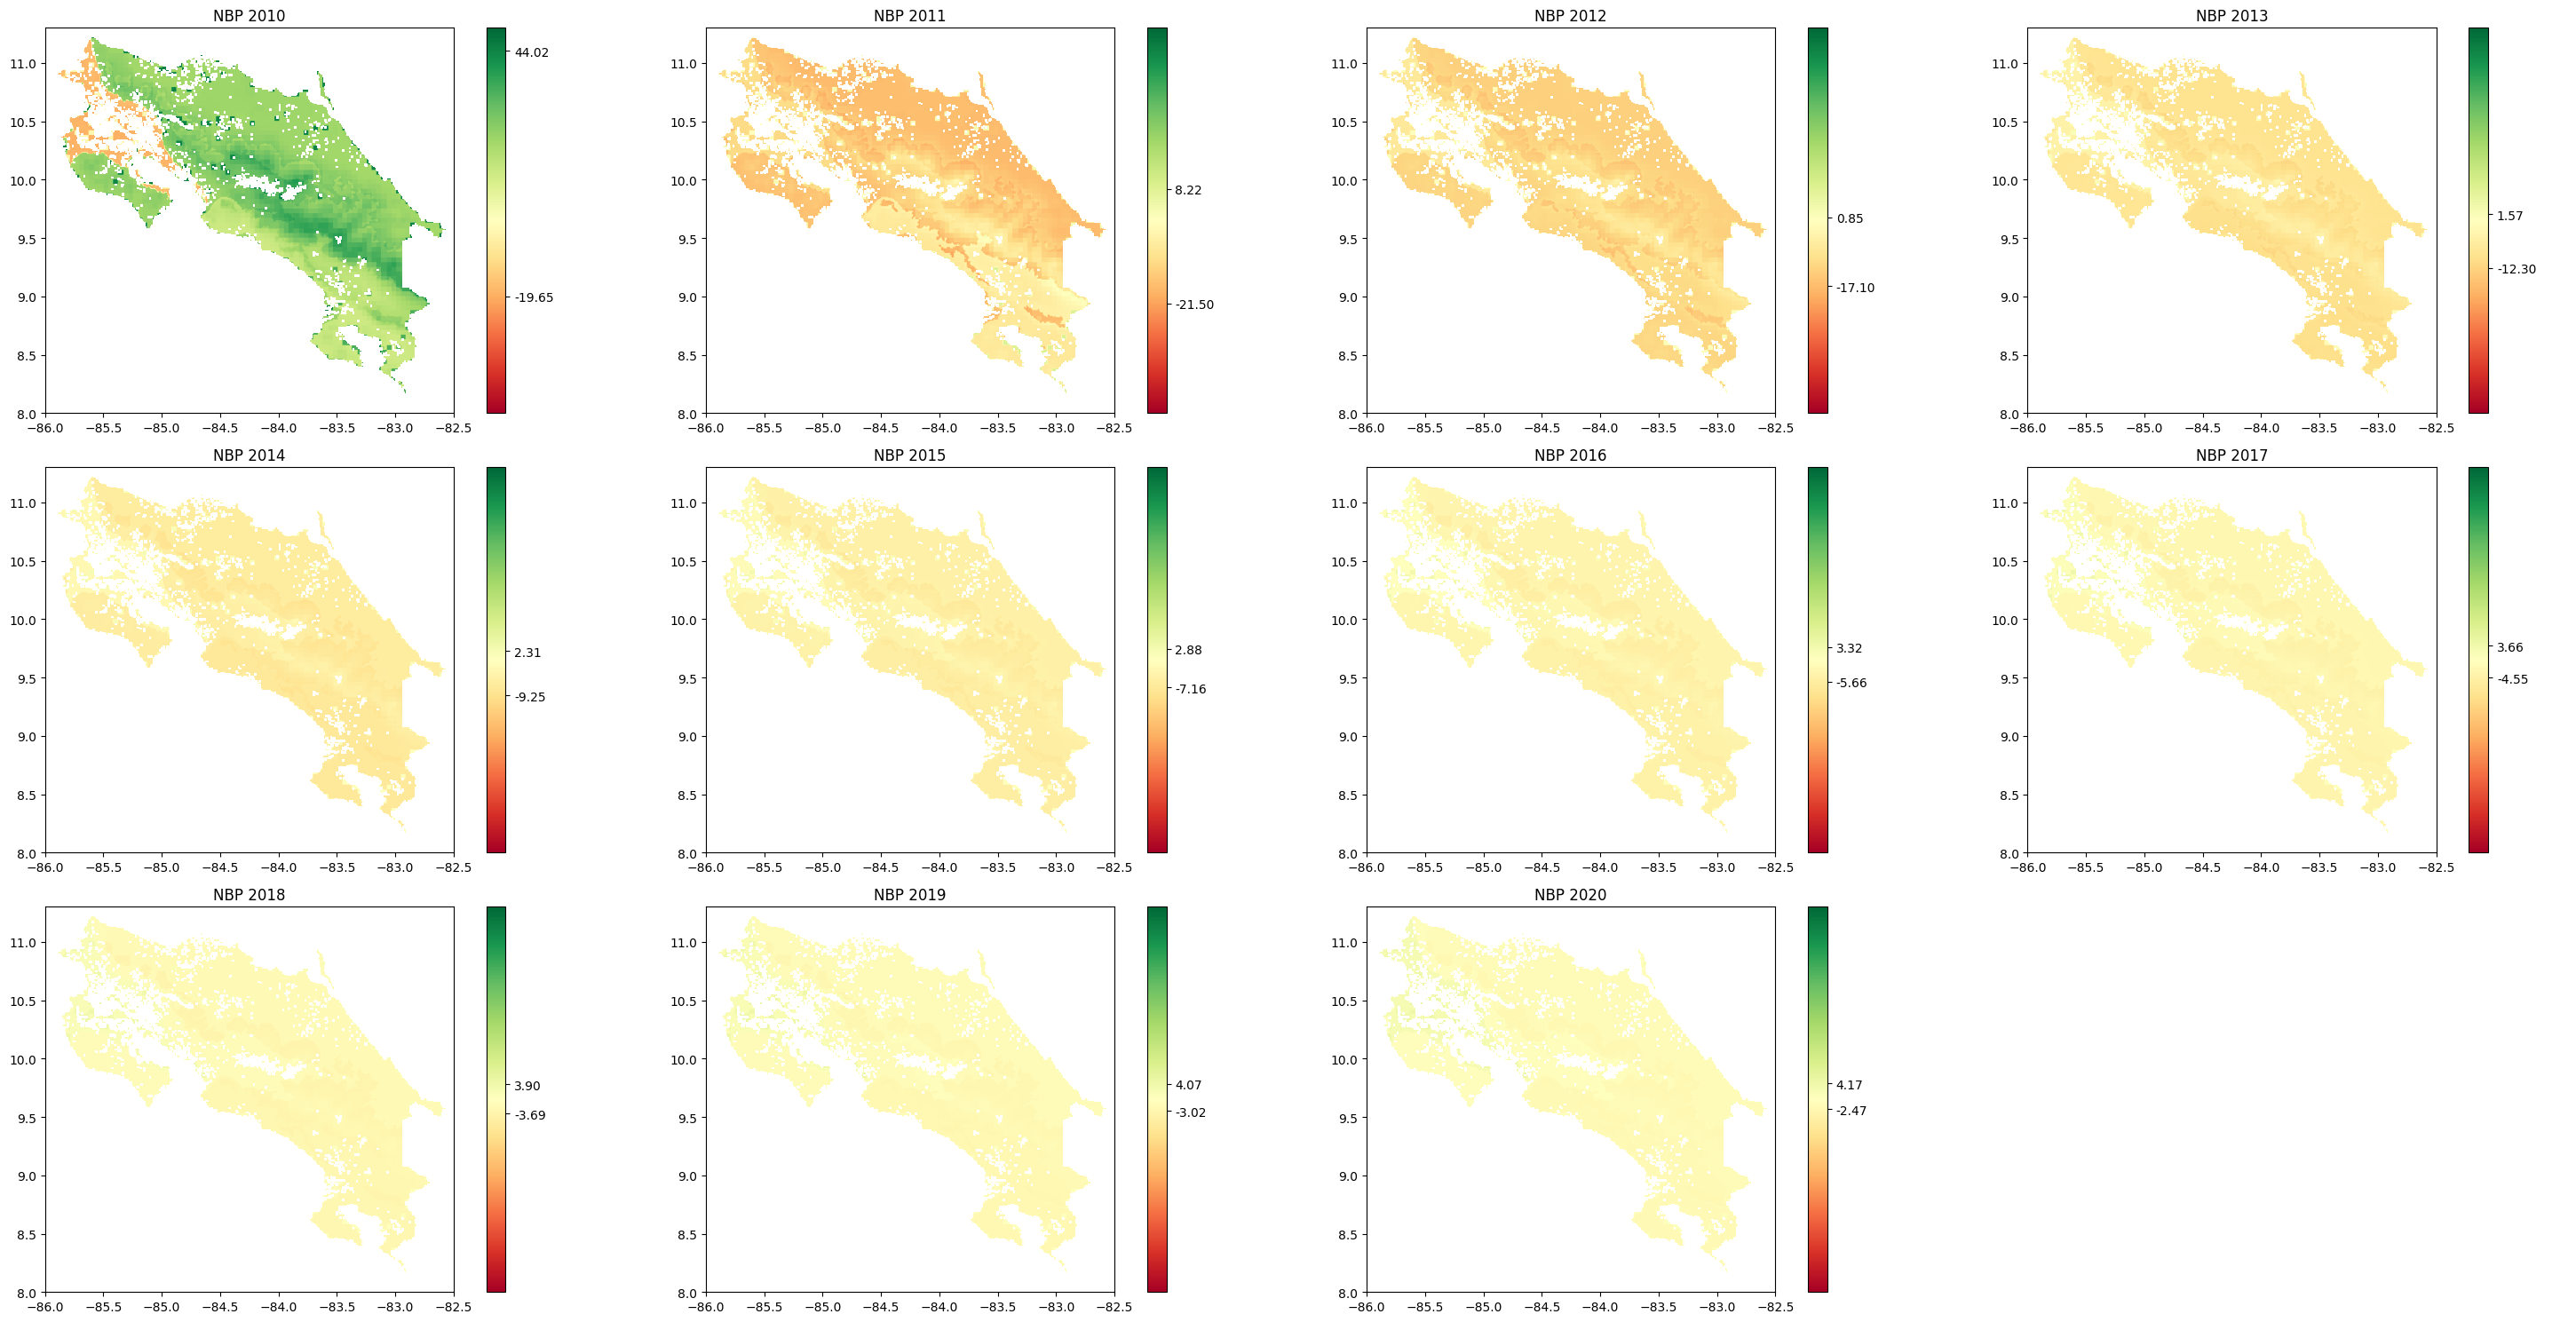

In [ ]:
mpl.rc('image', cmap='RdYlGn')

# Base directory containing the files
base_dir = '/content/spatial/'

# Set up the figure and axes for the subplots
fig, axs = plt.subplots(3, 4, figsize=(30, 15))  # 3 rows, 4 columns
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Define normalization for consistent color scaling across all maps
uniform_norm = colors.Normalize(vmin=-50, vmax=50)

# Loop through each year from 2010 to 2020
for index, year in enumerate(range(2010, 2021)):
    file_path = os.path.join(base_dir, f'NBP_{year}.tif')

    # Open the raster file
    with rasterio.open(file_path) as src:
        # Read the first band
        arr = src.read(1)
        # Replace values below -40 with NaN
        arr = np.where(arr < -40, np.nan, arr)

        # Plotting on specified subplot axis
        ax = axs[index]
        ax.set_title(f'NBP {year}')
        show(arr, transform=src.transform, ax=ax, cmap='RdYlGn', norm=uniform_norm)  # Apply uniform normalization here

        # Get the min and max of the current array (ignoring NaN values)
        min_val, max_val = np.nanmin(arr), np.nanmax(arr)

        # Create colorbar with the uniform scale -40 to 50
        mappable = cm.ScalarMappable(norm=uniform_norm, cmap='RdYlGn')
        cbar = fig.colorbar(mappable, ax=ax)

        # Set the colorbar to display only the actual min and max values
        cbar.set_ticks([min_val, max_val])
        cbar.set_ticklabels([f'{min_val:.2f}', f'{max_val:.2f}'])

# Hide unused axes
for ax in axs[index + 1:]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


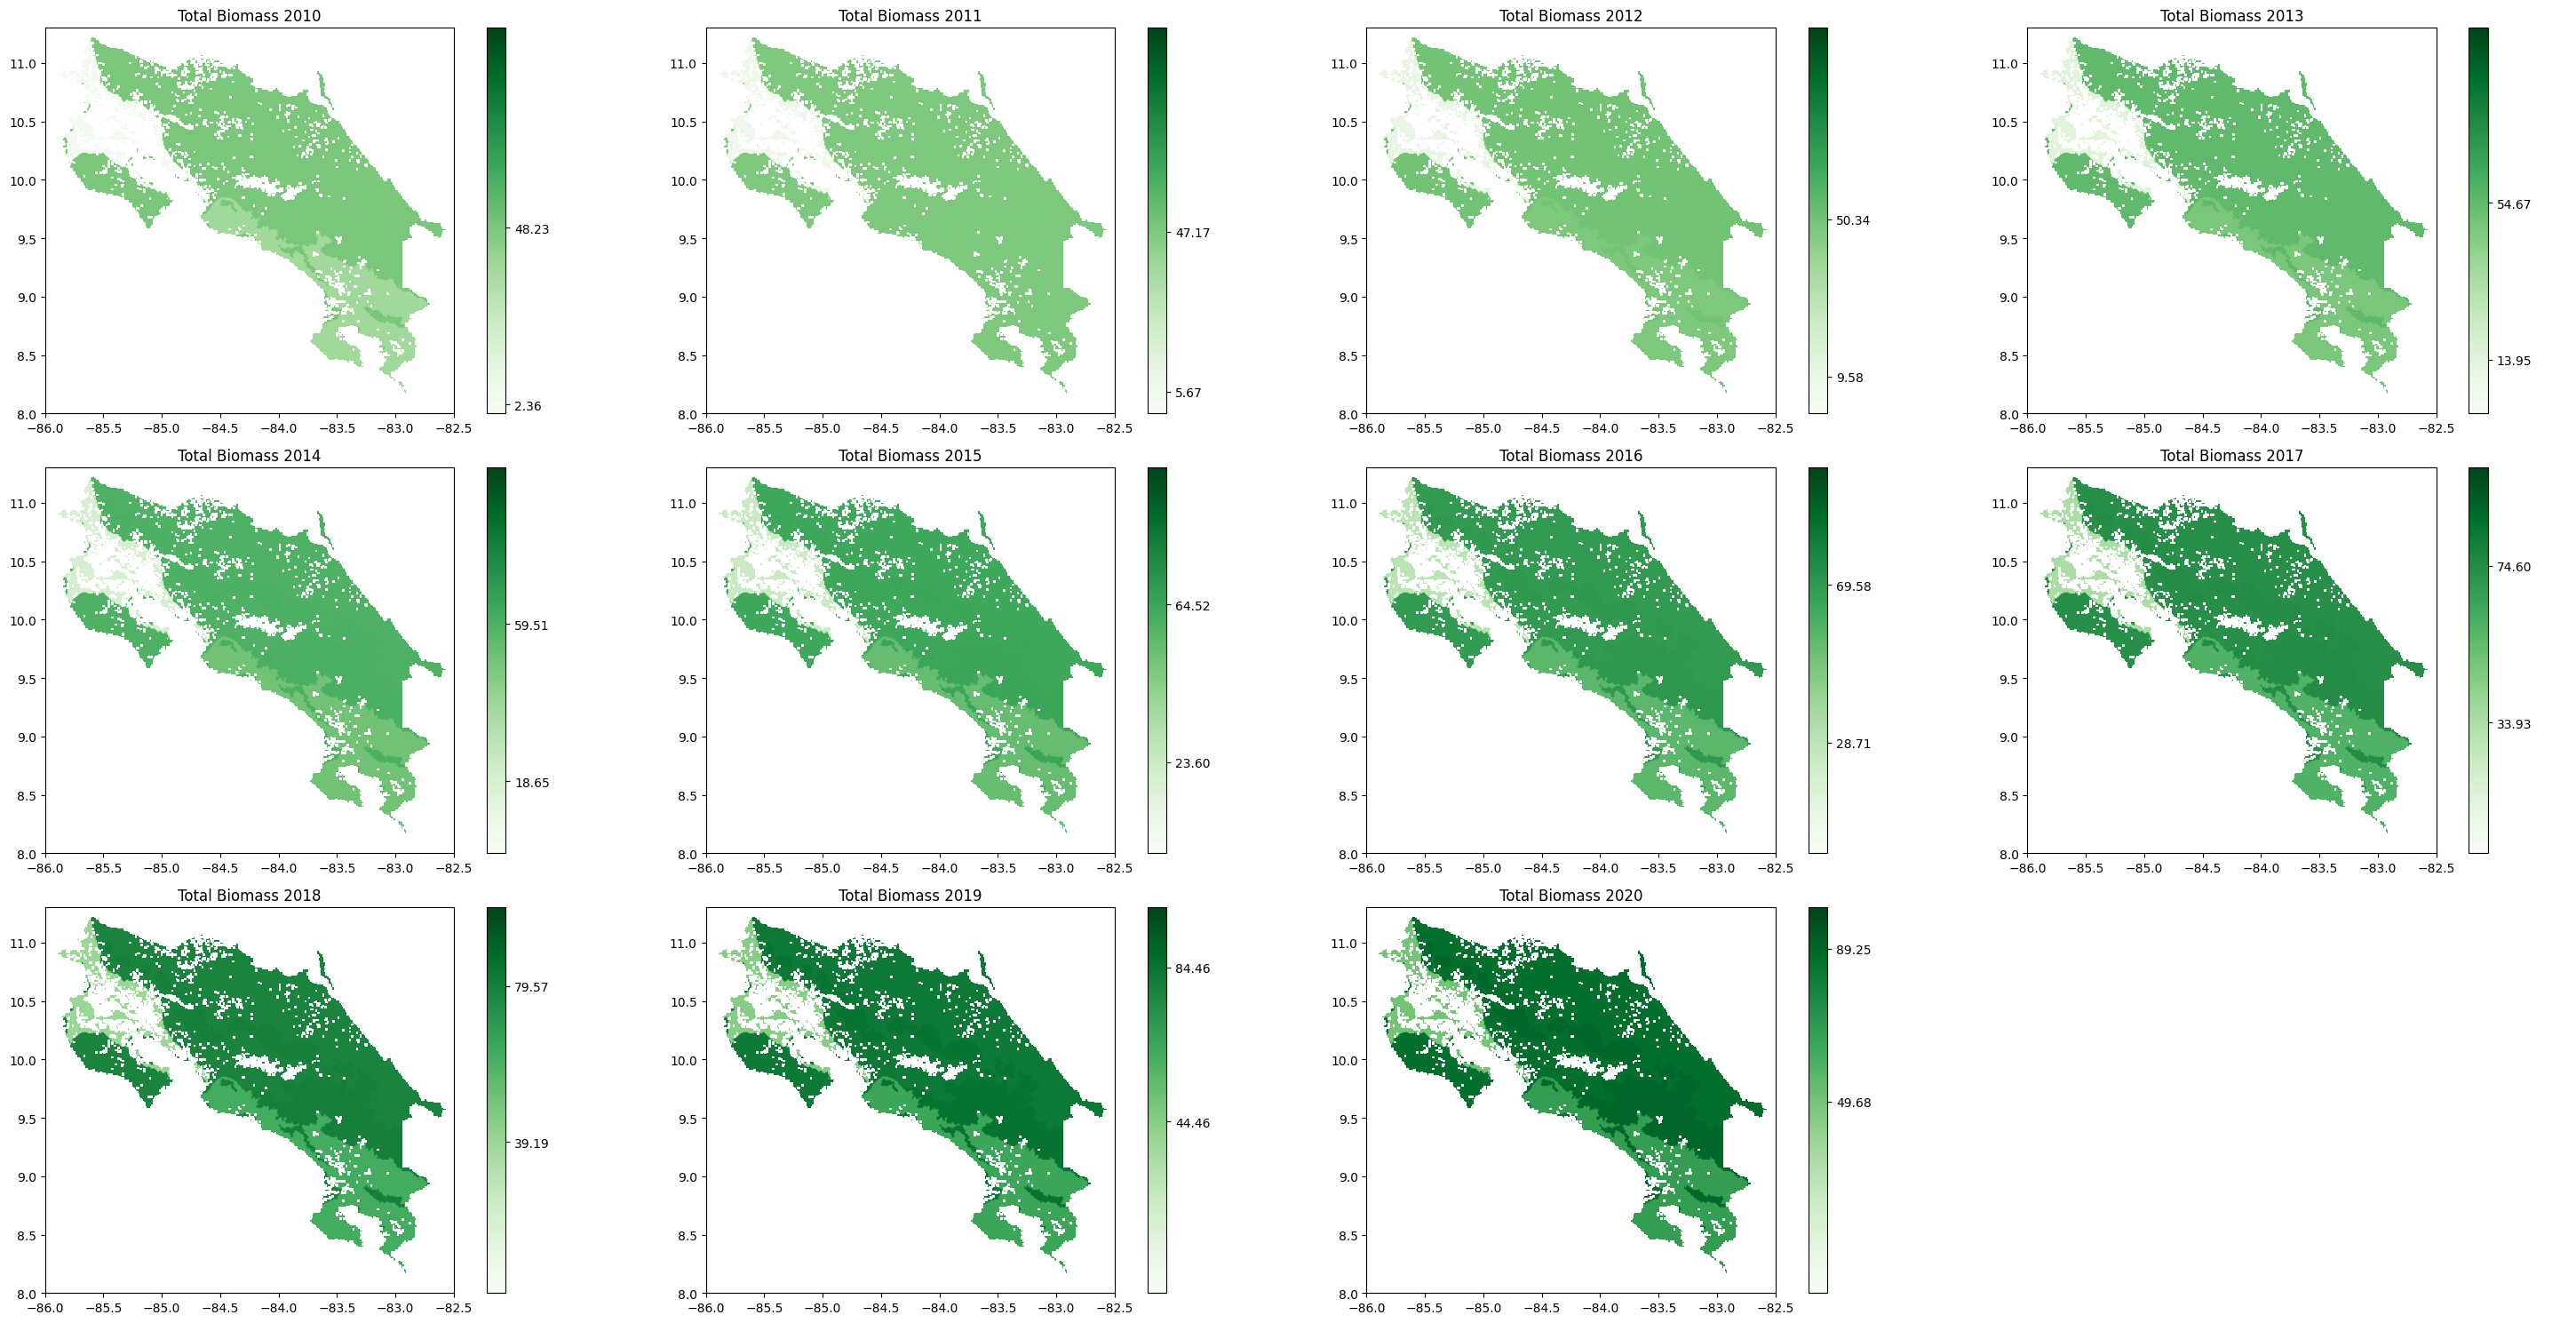

In [ ]:
mpl.rc('image', cmap='Greens')

# Base directory containing the files
base_dir = '/content/spatial/'

# Set up the figure and axes for the subplots
fig, axs = plt.subplots(3, 4, figsize=(30, 15))  # 3 rows, 4 columns
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Define normalization for consistent color scaling across all maps
uniform_norm = colors.Normalize(vmin=0, vmax=100)

# Loop through each year from 2010 to 2020
for index, year in enumerate(range(2010, 2021)):
    file_path = os.path.join(base_dir, f'Total_Biomass_C_{year}.tif')

    # Open the raster file
    with rasterio.open(file_path) as src:
        # Read the first band
        arr = src.read(1)
        # Replace values below -40 with NaN
        arr = np.where(arr < -40, np.nan, arr)

        # Plotting on specified subplot axis
        ax = axs[index]
        ax.set_title(f'Total Biomass {year}')
        show(arr, transform=src.transform, ax=ax, cmap='Greens', norm=uniform_norm)  # Apply uniform normalization here

        # Get the min and max of the current array (ignoring NaN values)
        min_val, max_val = np.nanmin(arr), np.nanmax(arr)

        # Create colorbar with the uniform scale -40 to 50
        mappable = cm.ScalarMappable(norm=uniform_norm, cmap='Greens')
        cbar = fig.colorbar(mappable, ax=ax)

        # Set the colorbar to display only the actual min and max values
        cbar.set_ticks([min_val, max_val])
        cbar.set_ticklabels([f'{min_val:.2f}', f'{max_val:.2f}'])

# Hide unused axes
for ax in axs[index + 1:]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


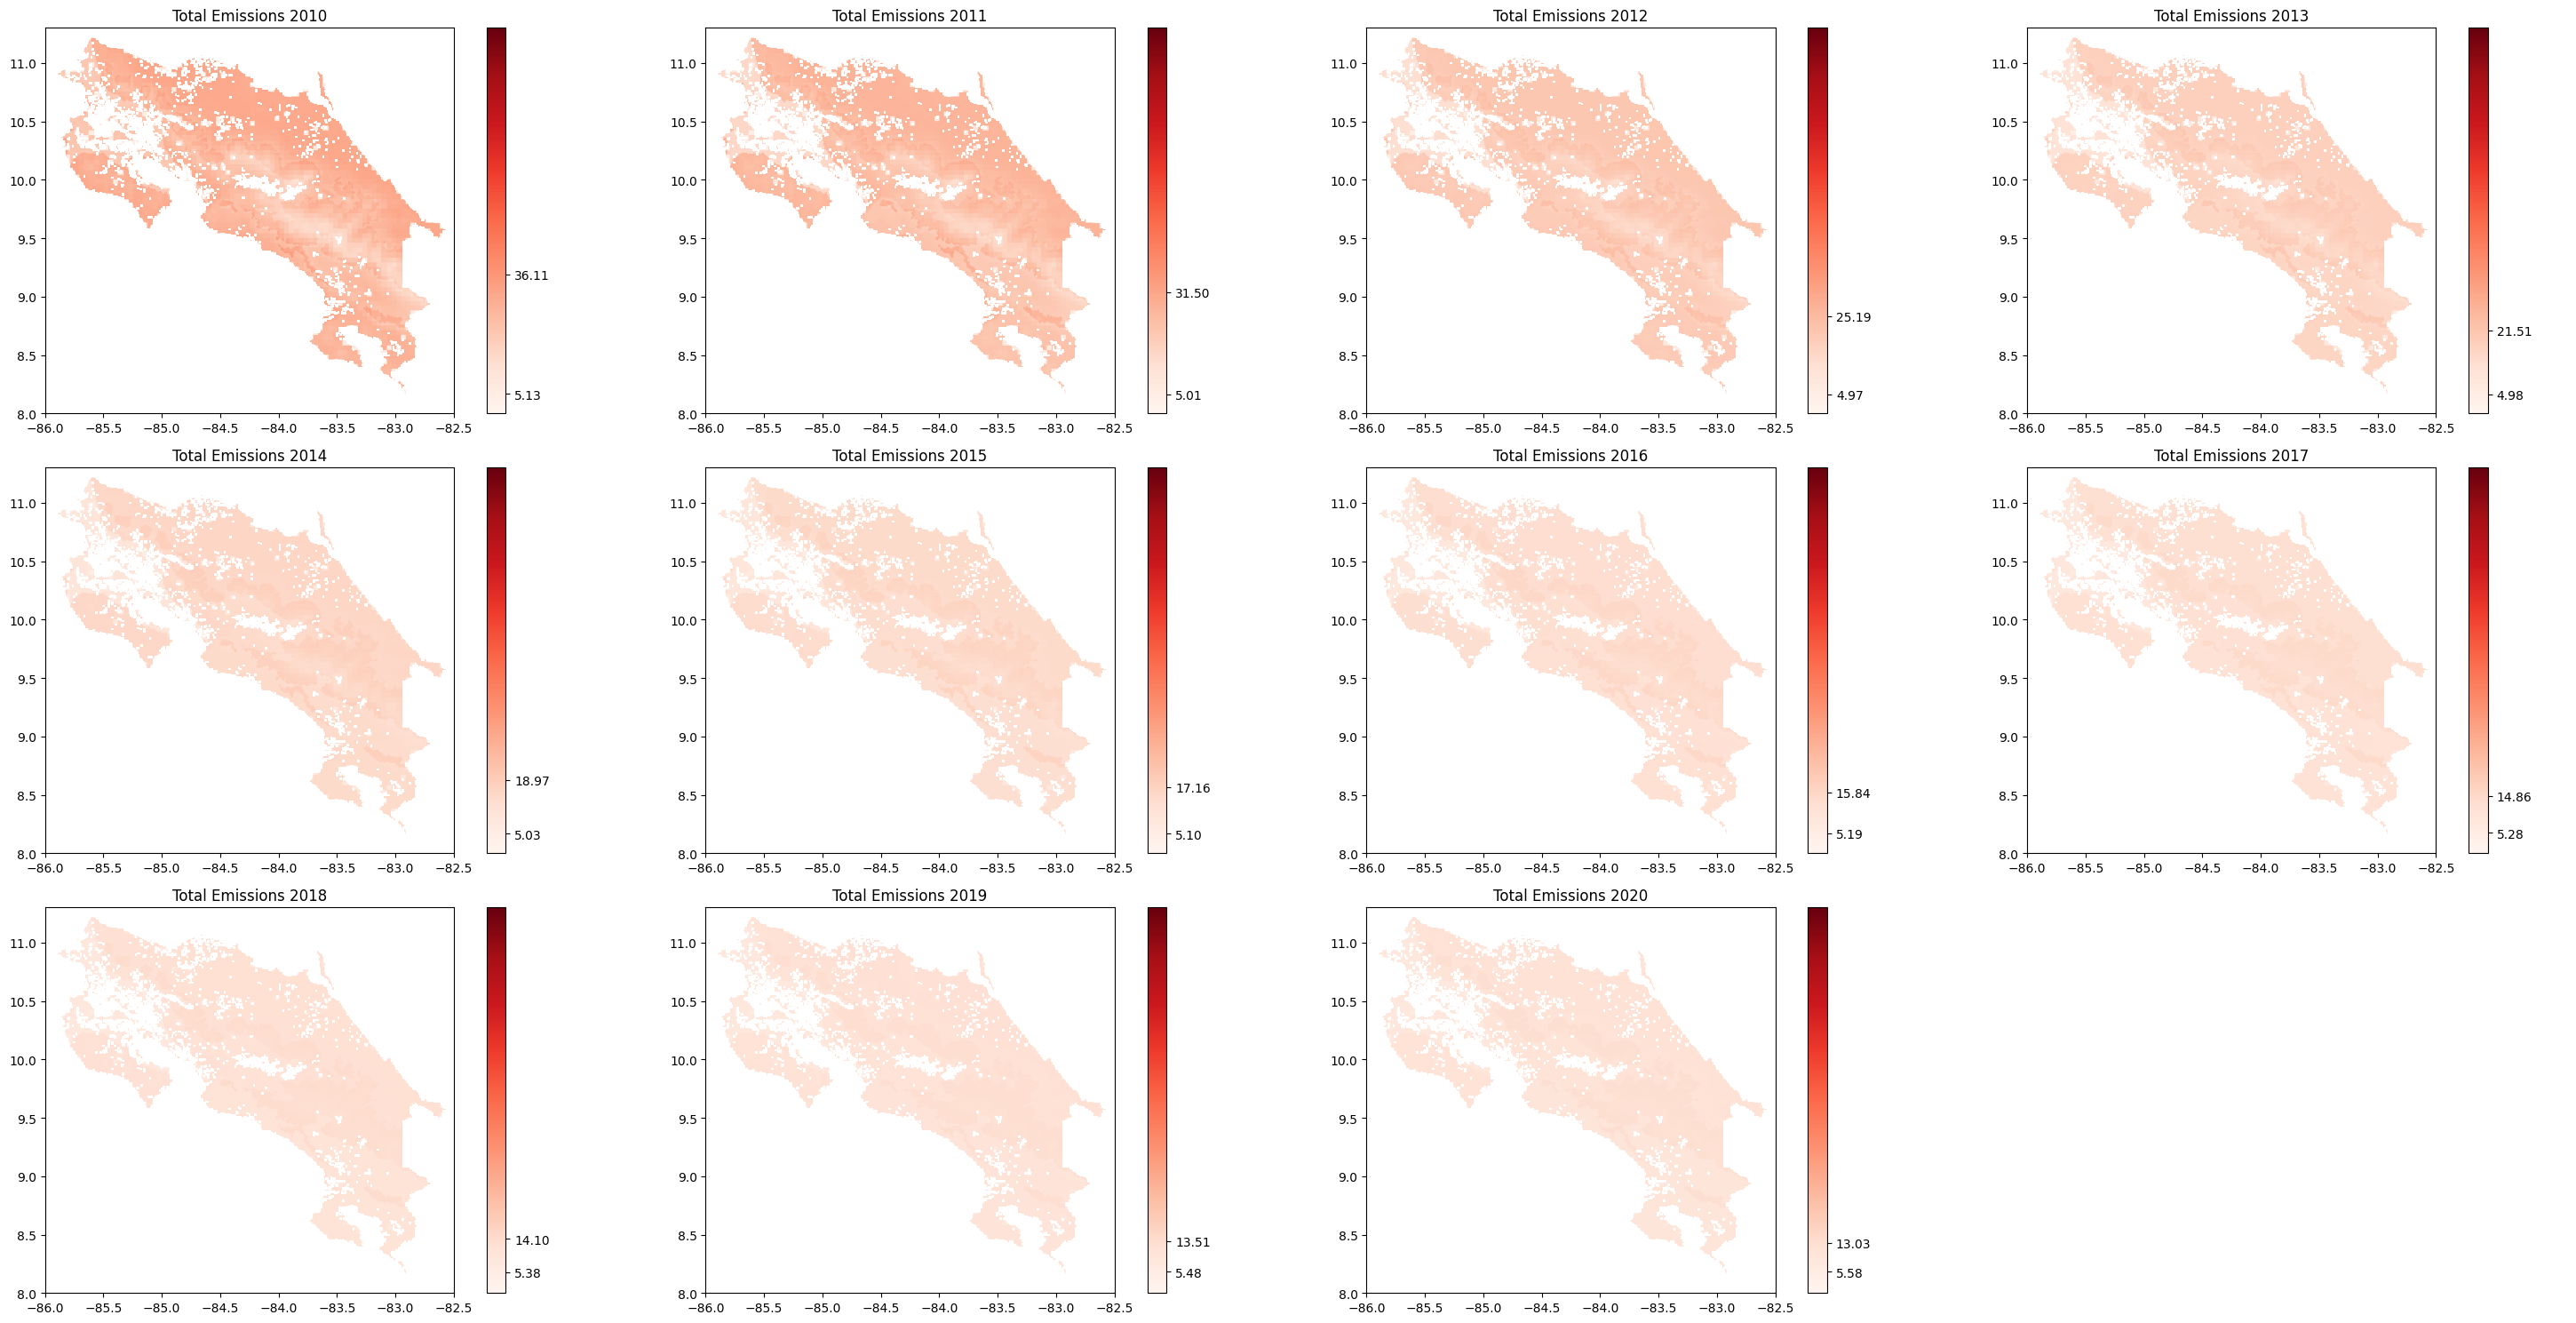

In [ ]:
mpl.rc('image', cmap='Reds')

# Base directory containing the files
base_dir = '/content/spatial/'

# Set up the figure and axes for the subplots
fig, axs = plt.subplots(3, 4, figsize=(30, 15))  # 3 rows, 4 columns
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Define normalization for consistent color scaling across all maps
uniform_norm = colors.Normalize(vmin=0, vmax=100)

# Loop through each year from 2010 to 2020
for index, year in enumerate(range(2010, 2021)):
    file_path = os.path.join(base_dir, f'Total_Emissions_{year}.tif')

    # Open the raster file
    with rasterio.open(file_path) as src:
        # Read the first band
        arr = src.read(1)
        # Replace values below -40 with NaN
        arr = np.where(arr < -40, np.nan, arr)

        # Plotting on specified subplot axis
        ax = axs[index]
        ax.set_title(f'Total Emissions {year}')
        show(arr, transform=src.transform, ax=ax, cmap='Reds', norm=uniform_norm)  # Apply uniform normalization here

        # Get the min and max of the current array (ignoring NaN values)
        min_val, max_val = np.nanmin(arr), np.nanmax(arr)

        # Create colorbar with the uniform scale -40 to 50
        mappable = cm.ScalarMappable(norm=uniform_norm, cmap='Reds')
        cbar = fig.colorbar(mappable, ax=ax)

        # Set the colorbar to display only the actual min and max values
        cbar.set_ticks([min_val, max_val])
        cbar.set_ticklabels([f'{min_val:.2f}', f'{max_val:.2f}'])

# Hide unused axes
for ax in axs[index + 1:]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
